In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import polars as pl
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
# import all lagged data
df_lagged_added_stats_sa199m2e = pd.read_csv('sa199m2e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa196m2e = pd.read_csv('sa196m2e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa196m1e = pd.read_csv('sa196m1e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa198m2e = pd.read_csv('sa198m2e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa196m3e = pd.read_csv('sa196m3e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa199m3e = pd.read_csv('sa199m3e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa199m1e = pd.read_csv('sa199m1e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa78m1 = pd.read_csv('sa78m1_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa78m3 = pd.read_csv('sa78m3_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa78m5 = pd.read_csv('sa78m5_new_newest_lagged_added_stats.csv')

In [4]:
grouped_lagged_added_stats = pd.concat([df_lagged_added_stats_sa199m2e,df_lagged_added_stats_sa196m2e,
df_lagged_added_stats_sa196m1e,df_lagged_added_stats_sa198m2e,df_lagged_added_stats_sa196m3e,df_lagged_added_stats_sa199m3e,
df_lagged_added_stats_sa199m1e,df_lagged_added_stats_sa78m1,df_lagged_added_stats_sa78m3,df_lagged_added_stats_sa78m5]).iloc[:,1:]

In [57]:
lag1_choice4_entries = grouped_lagged_added_stats.iloc[:,:][grouped_lagged_added_stats['Choice Output']>1]
lag1_choice4_entries = lag1_choice4_entries.iloc[:,:][lag1_choice4_entries['lagged_1_choice_ago']==4]

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Choice Output', ylabel='Count'>

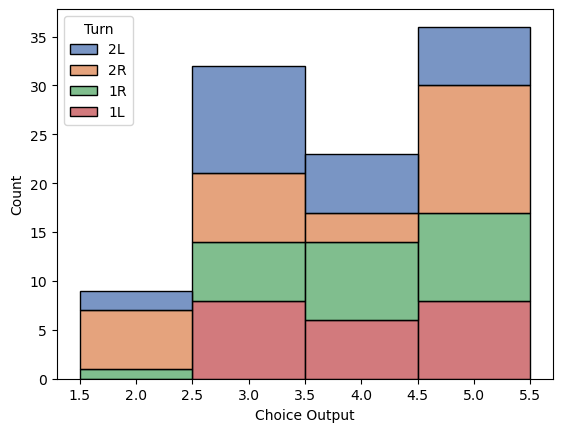

In [28]:
sns.histplot(data = lag1_choice4_entries.sort_values(by = 'Choice Output'), x = 'Choice Output', hue = 'Turn', multiple = 'stack', discrete = True, palette = 'deep')

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Turn', ylabel='Count'>

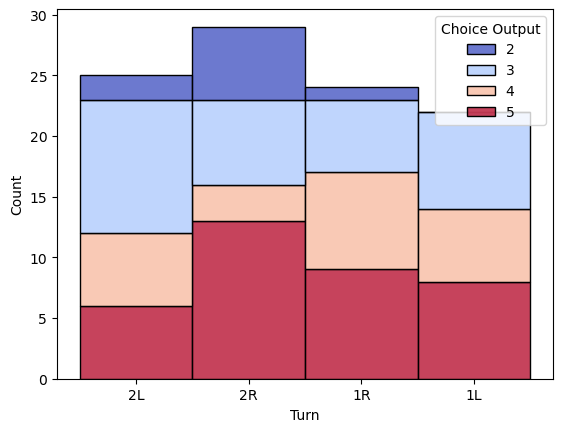

In [29]:
sns.histplot(data = lag1_choice4_entries.sort_values(by = 'Choice Output'), x = 'Turn', hue = 'Choice Output', multiple = 'stack', palette = 'coolwarm')

In [31]:
lag1_choice4_entries['Choice Output'] = lag1_choice4_entries['Choice Output'].astype(str)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='lagged_3_other_tortuosity', ylabel='Choice Output'>

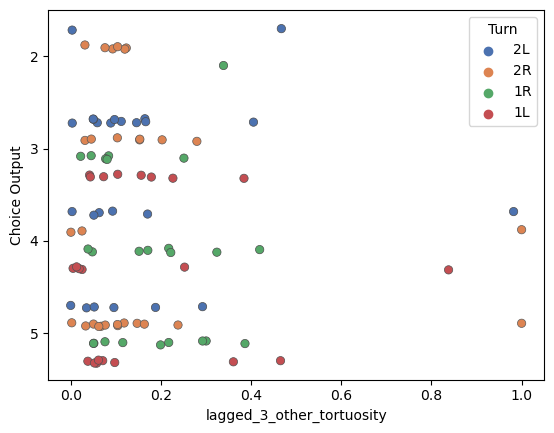

In [50]:
sns.stripplot(data = lag1_choice4_entries.sort_values(by = 'Choice Output'), x = 'lagged_3_other_tortuosity', y = 'Choice Output', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

In [46]:
lag1_choice4_entries.columns[200:300]

Index(['Entry Tortuosity', 'lagged_1_entry_tortuosity',
       'lagged_2_entry_tortuosity', 'lagged_3_entry_tortuosity',
       'lagged_4_entry_tortuosity', 'Exit Tortuosity',
       'lagged_1_exit_tortuosity', 'lagged_2_exit_tortuosity',
       'lagged_3_exit_tortuosity', 'lagged_4_exit_tortuosity',
       'Other Tortuosity', 'lagged_1_other_tortuosity',
       'lagged_2_other_tortuosity', 'lagged_3_other_tortuosity',
       'lagged_4_other_tortuosity', 'Exit Latency', 'lagged_1_exit_lat',
       'lagged_2_exit_lat', 'lagged_3_exit_lat', 'lagged_4_exit_lat',
       'Exit Latency Nose Movement', 'lagged_1_exit_lat_nose_mov',
       'lagged_2_exit_lat_nose_mov', 'lagged_3_exit_lat_nose_mov',
       'lagged_4_exit_lat_nose_mov', 'Exit Latency Nose Velocity',
       'lagged_1_exit_lat_nose_vel', 'lagged_2_exit_lat_nose_vel',
       'lagged_3_exit_lat_nose_vel', 'lagged_4_exit_lat_nose_vel',
       'Exit Latency Tail Movement', 'lagged_1_exit_lat_tail_mov',
       'lagged_2_exit_lat_tail_m

In [51]:
x_4_main = lag1_choice4_entries.drop(columns = ['Choice Output', 'Duration', 'Exit Latency', 
        'Nose Max Distance', 'Nose Time to Max Dist', 'Tail Base Max Distance', 'Tail Base Time to Max Dist', 'Entry Tortuosity', 'Exit Tortuosity',
        'Other Tortuosity', 'Arm Nose Movement', 'Arm Nose Velocity', 'Arm Tail Movement', 'Arm Tail Velocity',
        'Current Coeff',
       'lagged_1_current_coeff', 'lagged_2_current_coeff',
       'lagged_3_current_coeff', 'lagged_4_current_coeff',
       'Lagged 1 Cur Coeff', 'lagged_1_lagged_1_cur_coeff',
       'lagged_2_lagged_1_cur_coeff', 'lagged_3_lagged_1_cur_coeff',
       'lagged_4_lagged_1_cur_coeff', 'Lagged 2 Cur Coeff',
       'lagged_1_lagged_2_cur_coeff', 'lagged_2_lagged_2_cur_coeff',
       'lagged_3_lagged_2_cur_coeff', 'lagged_4_lagged_2_cur_coeff',
       'Lagged 3 Cur Coeff', 'lagged_1_lagged_3_cur_coeff',
       'lagged_2_lagged_3_cur_coeff', 'lagged_3_lagged_3_cur_coeff',
       'lagged_4_lagged_3_cur_coeff', 'Lagged 4 Cur Coeff',
       'lagged_1_lagged_4_cur_coeff', 'lagged_2_lagged_4_cur_coeff',
       'lagged_3_lagged_4_cur_coeff', 'lagged_4_lagged_4_cur_coeff',
        'Current Coeff Time Proportional', 'lagged_1_current_coeff_time_prop',
       'lagged_2_current_coeff_time_prop', 'lagged_3_current_coeff_time_prop',
       'lagged_4_current_coeff_time_prop',
       'Lagged 1 Cur Coeff Time Proportional',
       'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop',
       'lagged_3_lagged_1_cur_coeff_time_prop',
       'lagged_4_lagged_1_cur_coeff_time_prop',
       'Lagged 2 Cur Coeff Time Proportional',
       'lagged_1_lagged_2_cur_coeff_time_prop',
       'lagged_2_lagged_2_cur_coeff_time_prop',
       'lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop',
       'Lagged 3 Cur Coeff Time Proportional',
       'lagged_1_lagged_3_cur_coeff_time_prop',
       'lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop',
       'lagged_4_lagged_3_cur_coeff_time_prop',
       'Lagged 4 Cur Coeff Time Proportional',
       'lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop',
       'lagged_3_lagged_4_cur_coeff_time_prop',
       'lagged_4_lagged_4_cur_coeff_time_prop',                                                                                                'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop','lagged_3_lagged_1_cur_coeff_time_prop','lagged_4_lagged_1_cur_coeff_time_prop',
       'lagged_1_lagged_2_cur_coeff_time_prop','lagged_2_lagged_2_cur_coeff_time_prop','lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop','lagged_1_lagged_3_cur_coeff_time_prop','lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop','lagged_4_lagged_3_cur_coeff_time_prop','lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop','lagged_3_lagged_4_cur_coeff_time_prop','lagged_4_lagged_4_cur_coeff_time_prop', 
        'Turn', 'lagged_1_turn_ago', 'lagged_2_turn_ago', 'lagged_3_turn_ago', 'lagged_4_turn_ago', 
        '2_cur_arm_duration', '3_cur_arm_duration', '4_cur_arm_duration',
       '5_cur_arm_duration', 'mean_2_cur_arm_duration',
       'mean_3_cur_arm_duration', 'mean_4_cur_arm_duration',
       'mean_5_cur_arm_duration', '2_past_arm_duration', '3_past_arm_duration',
       '4_past_arm_duration', 'mean_2_past_arm_duration',
       'mean_3_past_arm_duration', 'mean_4_past_arm_duration',
       '2_past_mid_duration', '3_past_mid_duration', '4_past_mid_duration',
       '5_past_mid_duration', 'mean_2_past_mid_duration',
       'mean_3_past_mid_duration', 'mean_4_past_mid_duration',
       'mean_5_past_mid_duration', '2_past_exitmid_duration',
       '3_past_exitmid_duration', '4_past_exitmid_duration',
       '5_past_exitmid_duration', 'mean_2_past_exitmid_duration',
       'mean_3_past_exitmid_duration', 'mean_4_past_exitmid_duration',
       'mean_5_past_exitmid_duration', '2_past_midentry_duration',
       '3_past_midentry_duration', '4_past_midentry_duration',
       '5_past_midentry_duration', 'mean_2_past_midentry_duration',
       'mean_3_past_midentry_duration', 'mean_4_past_midentry_duration',
       'mean_5_past_midentry_duration', '2_past_exitmidentry_duration',
       '3_past_exitmidentry_duration', '4_past_exitmidentry_duration',
       '5_past_exitmidentry_duration', 'mean_2_past_exitmidentry_duration',
       'mean_3_past_exitmidentry_duration',
       'mean_4_past_exitmidentry_duration',
       'mean_5_past_exitmidentry_duration',                                                                                                              
        'lagged_1_choice_ago', 'lagged_2_choice_ago', 'lagged_3_choice_ago',
       'lagged_4_choice_ago',
        'lagged_1_new_lagged_1_cur_coeff',
        'lagged_2_new_lagged_1_cur_coeff', 
        'lagged_3_new_lagged_1_cur_coeff','lagged_4_new_lagged_1_cur_coeff','lagged_1_new_lagged_2_cur_coeff', 'lagged_2_new_lagged_2_cur_coeff', 
        'lagged_3_new_lagged_2_cur_coeff', 'lagged_4_new_lagged_2_cur_coeff','lagged_1_new_lagged_3_cur_coeff','lagged_2_new_lagged_3_cur_coeff', 
        'lagged_3_new_lagged_3_cur_coeff','lagged_4_new_lagged_3_cur_coeff','lagged_1_new_lagged_4_cur_coeff', 'lagged_2_new_lagged_4_cur_coeff',
        'lagged_3_new_lagged_4_cur_coeff', 'lagged_4_new_lagged_4_cur_coeff','lagged_1_new_lagged_1_cur_coeff_time_prop',
       'lagged_2_new_lagged_1_cur_coeff_time_prop','lagged_3_new_lagged_1_cur_coeff_time_prop','lagged_4_new_lagged_1_cur_coeff_time_prop',
       'lagged_1_new_lagged_2_cur_coeff_time_prop','lagged_2_new_lagged_2_cur_coeff_time_prop','lagged_3_new_lagged_2_cur_coeff_time_prop',
       'lagged_4_new_lagged_2_cur_coeff_time_prop','lagged_1_new_lagged_3_cur_coeff_time_prop','lagged_2_new_lagged_3_cur_coeff_time_prop',
       'lagged_3_new_lagged_3_cur_coeff_time_prop','lagged_4_new_lagged_3_cur_coeff_time_prop','lagged_1_new_lagged_4_cur_coeff_time_prop',
       'lagged_2_new_lagged_4_cur_coeff_time_prop','lagged_3_new_lagged_4_cur_coeff_time_prop','lagged_4_new_lagged_4_cur_coeff_time_prop',
        'Exit Latency Nose Movement', 'Exit Latency Nose Velocity', 'Exit Latency Tail Movement', 'Exit Latency Tail Velocity',
        'New Lagged 2 Cur Coeff', 'New Lagged 3 Cur Coeff', 'New Lagged 4 Cur Coeff', 'New Lagged 2 Cur Coeff Time Proportional',
        'New Lagged 3 Cur Coeff Time Proportional', 'New Lagged 4 Cur Coeff Time Proportional', 
        'Other Tortuosity', 'lagged_1_other_tortuosity',
       'lagged_2_other_tortuosity', 'lagged_3_other_tortuosity',
       'lagged_4_other_tortuosity'])

In [56]:
x_ = x_4_main.values

In [58]:
y_ = lag1_choice4_entries['Choice Output'].values

In [107]:
X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size=0.2, random_state=10)

In [125]:
mod = GradientBoostingClassifier(n_estimators = 450, max_depth=4, learning_rate=0.01)
mod.fit(X_train, y_train)
y_pred = mod.predict(X_test)

In [126]:
target_names = ['2', '3', '4', '5']

In [127]:
f1_sc = f1_score(y_test, y_pred, average = 'weighted')
f1_sc

0.3659090909090909

In [128]:
p_sc = precision_score(y_test, y_pred, average = 'weighted')
p_sc

0.4180555555555555

In [129]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[0, 1, 1, 1],
       [1, 4, 2, 0],
       [0, 3, 0, 0],
       [0, 1, 3, 3]], dtype=int64)

In [130]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         3
           3       0.44      0.57      0.50         7
           4       0.00      0.00      0.00         3
           5       0.75      0.43      0.55         7

    accuracy                           0.35        20
   macro avg       0.30      0.25      0.26        20
weighted avg       0.42      0.35      0.37        20



In [70]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [71]:
param_grid1 = {'n_estimators' : [50, 100,120,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000],
                'max_depth' : [3,4,5,6,7,8,9,10,15,20,25,30,35],
                #'min_samples_split' : [2, 4, 8],
                'learning_rate' : [0.01,0.05, 0.07, 0.1, 0.3, 0.5, 0.7],
                #'min_samples_leaf' : [1,2,4,8],
                #'max_features' : [8, 16, 24, 32, 40, 48, 56, 60],
}

In [72]:
search = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = param_grid1, scoring ='f1_weighted', verbose = 4)

In [73]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 1911 candidates, totalling 9555 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.287 total time=   0.7s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.063 total time=   0.7s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.255 total time=   0.7s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.306 total time=   0.7s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.322 total time=   0.7s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.298 total time=   1.5s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.194 total time=   1.5s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.284 total time=   1.5s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.306 total time=   1.5s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.453

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.3, 0.5,
                                           0.7],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30,
                                       35],
                         'n_estimators': [50, 100, 120, 150, 200, 250, 300, 350,
                                          400, 450, 500, 550, 600, 650, 700,
                                          750, 800, 850, 900, 950, 1000]},
             scoring='f1_weighted', verbose=4)

In [74]:
search.best_estimator_

GradientBoostingClassifier(learning_rate=0.7, max_depth=4, n_estimators=450)

In [76]:
search.best_params_

{'learning_rate': 0.7, 'max_depth': 4, 'n_estimators': 450}

In [79]:
search.n_splits_

5